In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from openfast_toolbox.io import FASTOutputFile

In [2]:
outb_files = ['C:/code/ActiveHybridMooring/SurrogateModel/OpenFAST files/VolturnUS-15MW_Taut_1000m_1.outb',
              'C:/code/ActiveHybridMooring/SurrogateModel/OpenFAST files/VolturnUS-15MW_Taut_1000m_2.outb',
              'C:/code/ActiveHybridMooring/SurrogateModel/OpenFAST files/VolturnUS-15MW_Taut_1000m_3.outb',
              'C:/code/ActiveHybridMooring/SurrogateModel/OpenFAST files/VolturnUS-15MW_Taut_1000m_4.outb',
              'C:/code/ActiveHybridMooring/SurrogateModel/OpenFAST files/VolturnUS-15MW_Taut_1000m_5.outb']

In [3]:
iteration = slice(660000, -1, 1)

In [4]:
def organize_variables(df):
    vars = dict(
    time = df['Time_[s]'][iteration],
    wave_elev = df['Wave1Elev_[m]'][iteration],

    l1px = df['BODY1PX_[m]'][iteration],
    l1py = df['BODY1PY_[m]'][iteration],
    l1pz = df['BODY1PZ_[m]'][iteration],
    l1vx = df['BODY1VX_[m/s]'][iteration],
    l1vy = df['BODY1VY_[m/s]'][iteration],
    l1vz = df['BODY1VZ_[m/s]'][iteration],
    l1fx = df['LINE1N50FX_[N]'][iteration],
    l1fy = df['LINE1N50FY_[N]'][iteration],
    l1fz = df['LINE1N50FZ_[N]'][iteration],

    l2px = df['BODY2PX_[m]'][iteration],
    l2py = df['BODY2PY_[m]'][iteration],
    l2pz = df['BODY2PZ_[m]'][iteration],
    l2vx = df['BODY2VX_[m/s]'][iteration],
    l2vy = df['BODY2VY_[m/s]'][iteration],
    l2vz = df['BODY2VZ_[m/s]'][iteration],
    l2fx = df['LINE3N50FX_[N]'][iteration],
    l2fy = df['LINE3N50FY_[N]'][iteration],
    l2fz = df['LINE3N50FZ_[N]'][iteration],

    l3px = df['BODY3PX_[m]'][iteration],
    l3py = df['BODY3PY_[m]'][iteration],
    l3pz = df['BODY3PZ_[m]'][iteration],
    l3vx = df['BODY3VX_[m/s]'][iteration],
    l3vy = df['BODY3VY_[m/s]'][iteration],
    l3vz = df['BODY3VZ_[m/s]'][iteration],
    l3fx = df['LINE5N50FX_[N]'][iteration],
    l3fy = df['LINE5N50FY_[N]'][iteration],
    l3fz = df['LINE5N50FZ_[N]'][iteration]
    )
    
    return pd.DataFrame.from_dict(vars)

In [5]:
# dfs = []
# for outb_file in outb_files:
#     df = FASTOutputFile(outb_file).toDataFrame()
#     dfs.append(organize_variables(df))

In [6]:
df = FASTOutputFile(outb_files[0]).toDataFrame()
data = organize_variables(df)

In [7]:
data_60s = data[:6000]

In [8]:
s = 'l1py'
print(f'[{data_60s[s].min():.2f}, {data_60s[s].max():.2f}]') 

[-0.01, 0.01]


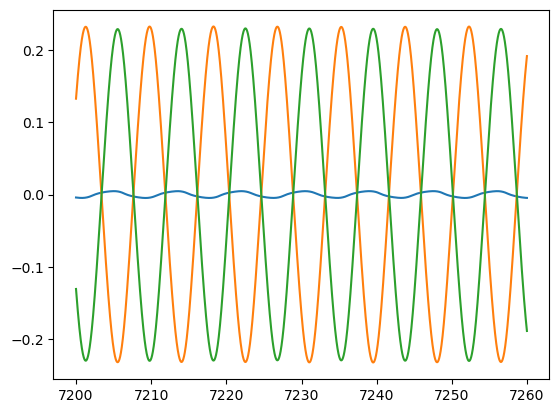

In [9]:
plt.plot(data_60s['time'], data_60s['l1vy'])
plt.plot(data_60s['time'], data_60s['l2vy'])
plt.plot(data_60s['time'], data_60s['l3vy'])


In [10]:
# comb_df = pd.concat(dfs, ignore_index=True)

In [11]:
# comb_df

In [12]:
# comb_df.to_parquet('openfast_lin_results_sampling.parquet')

In [13]:
sl_res = np.genfromtxt('../MATLAB/Simulink_results_dynamic_relax.csv', delimiter=',')
sl_t = np.arange(0, 60.0, 0.01)
sl_l1fx = sl_res[6001:, 0]
sl_l1fy = sl_res[6001:, 1]
sl_l1fz = sl_res[6001:, 2]
sl_l2fx = sl_res[6001:, 3]
sl_l2fy = sl_res[6001:, 4]
sl_l2fz = sl_res[6001:, 5]
sl_l3fx = sl_res[6001:, 6]
sl_l3fy = sl_res[6001:, 7]
sl_l3fz = sl_res[6001:, 8]

In [66]:
def get_error(sl, data):
    return np.abs((sl.mean() - data.mean()) / data.mean()) * 100

In [75]:
get_error(sl_l3fz, data['l3fz'])

4.484362804314671

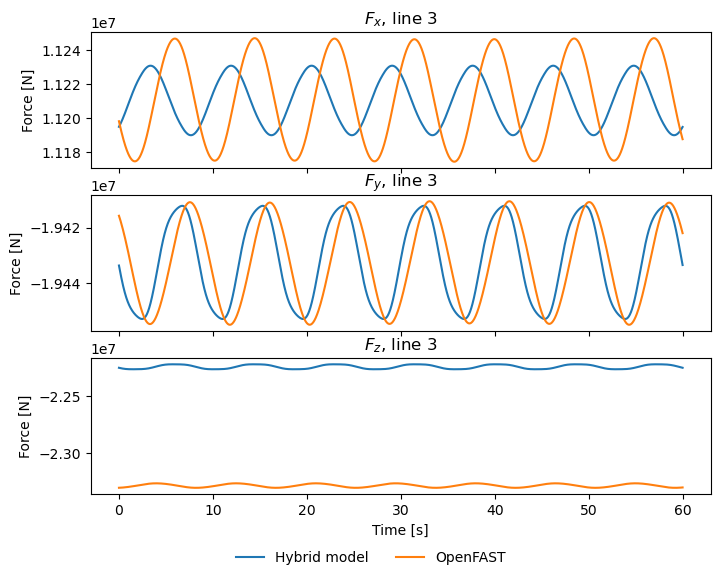

In [54]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(8,6))
ax[0].plot(sl_t, sl_l3fx, label='Hybrid model')
ax[0].plot(sl_t, data_60s['l3fx'], label='OpenFAST')
ax[0].set_ylabel('Force [N]')
ax[0].set_title(r'$F_x$, line 3')

ax[1].plot(sl_t, sl_l3fy, label='Hybrid model')
ax[1].plot(sl_t, data_60s['l3fy'], label='OpenFAST')
ax[1].set_ylabel('Force [N]')
ax[1].set_title(r'$F_y$, line 3')

ax[2].plot(sl_t, sl_l3fz, label='Hybrid model')
ax[2].plot(sl_t, data_60s['l3fz'], label='OpenFAST')
ax[2].set_ylabel('Force [N]')
ax[2].set_title(r'$F_z$, line 3')

ax[2].set_xlabel('Time [s]')
handles, labels = ax[1].get_legend_handles_labels()

fig.legend(handles, labels, loc=(0.32, 0), ncol=2, frameon=False)

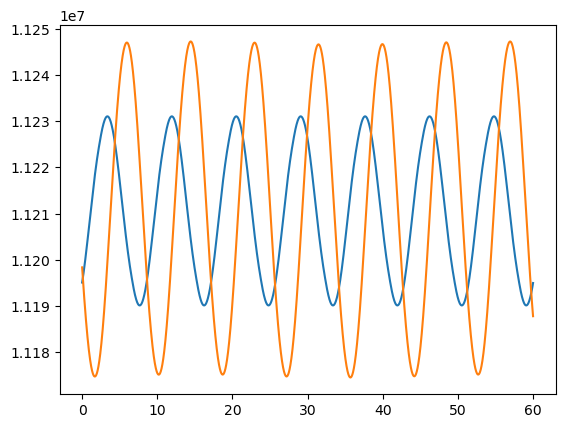

In [16]:
plt.plot(sl_t, sl_l3fx)
plt.plot(sl_t, data_60s['l3fx'])